In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
classifier = Sequential()

classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (40, 40, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(.2))

classifier.add(Dense(units =44, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [4]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = .2, rotation_range = 25)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Train', target_size = (40, 40), 
                                                 batch_size = 32, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('Dataset/Test', target_size = (40, 40), 
                                                 batch_size = 32, class_mode = 'categorical')

Found 1096 images belonging to 44 classes.
Found 1096 images belonging to 44 classes.


In [5]:
classifier.fit(training_set, epochs = 500,
                        validation_data = test_set, validation_steps = 3000)

Epoch 1/500
35/35 [==============================] - 17s 474ms/step - loss: 3.8015 - accuracy: 0.0201 - val_loss: 3.7840 - val_accuracy: 0.0237
Epoch 2/500
35/35 [==============================] - 10s 279ms/step - loss: 3.7852 - accuracy: 0.0210
Epoch 3/500
35/35 [==============================] - 10s 280ms/step - loss: 3.7857 - accuracy: 0.0219
Epoch 4/500
35/35 [==============================] - 10s 276ms/step - loss: 3.7848 - accuracy: 0.0201
Epoch 5/500
35/35 [==============================] - 10s 279ms/step - loss: 3.7848 - accuracy: 0.0210
Epoch 6/500
35/35 [==============================] - 10s 279ms/step - loss: 3.7834 - accuracy: 0.0246
Epoch 7/500
35/35 [==============================] - 10s 278ms/step - loss: 3.7523 - accuracy: 0.0401
Epoch 8/500
35/35 [==============================] - 10s 282ms/step - loss: 3.5620 - accuracy: 0.0739
Epoch 9/500
35/35 [==============================] - 10s 278ms/step - loss: 3.3518 - accuracy: 0.1031
Epoch 10/500
35/35 [====================

In [6]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 19, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

In [7]:
classifier_json = classifier.to_json()

with open("CNN_Kannada.json", "w") as json_file:
    json_file.write(classifier_json)
    
classifier.save_weights("CNN_Kannada.h5")
print('Saved model to disk')

Saved model to disk


In [8]:
import PIL
from PIL import ImageTk, ImageDraw, Image
from tkinter import *
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import os

In [9]:
def create_new_image():
    width = 256
    height = 256
    center = height // 2
    white = (255, 255, 255)
    green = (0, 128, 0)
    
    def save():
        filename = 'C:/Users/hp/Desktop/kcharacter/Dataset/SinglePrediction/image.jpg'
        image.save(filename)
        
    def paint(event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        cv.create_oval(x1, y1, x2, y2, fill = 'black', width = 10)
        draw.line([x1, y1, x2, y2], fill = 'black', width = 10)
        
    root = Tk()
    
    cv = Canvas(root, width = width, height = height, bg = 'white')
    cv.pack()
    
    image = PIL.Image.new('RGB', (width, height), white)
    draw = ImageDraw.Draw(image)
    
    cv.pack(expand = YES, fill = BOTH)
    cv.bind("<B1-Motion>", paint)
    
    button = Button(text = 'Save', command = save)
    button.pack()
    
    root.mainloop()

In [10]:
training_set.class_indices

{'172': 0,
 '173': 1,
 '174': 2,
 '175': 3,
 '176': 4,
 '177': 5,
 '178': 6,
 '179': 7,
 '180': 8,
 '181': 9,
 '182': 10,
 '183': 11,
 '184': 12,
 '185': 13,
 '186': 14,
 '187': 15,
 '188': 16,
 '189': 17,
 '190': 18,
 '191': 19,
 '192': 20,
 '193': 21,
 '194': 22,
 '195': 23,
 '196': 24,
 '197': 25,
 '198': 26,
 '199': 27,
 '200': 28,
 '201': 29,
 '202': 30,
 '203': 31,
 '204': 32,
 '205': 33,
 '206': 34,
 '207': 35,
 '208': 36,
 '209': 37,
 '210': 38,
 '211': 39,
 '212': 40,
 '213': 41,
 '214': 42,
 '216': 43}

In [11]:
def determine_character(res):
    if res == 0:
        print('prediction : ಅ')
    elif res == 1:
        print('prediction : ಇ')
    elif res == 2:
        print('prediction : ಈ')
    elif res == 3:
        print('prediction : ಉ')
    elif res == 4:
        print('prediction : ಊ')
    elif res == 5:
        print('prediction : ಎ')
    elif res == 6:
        print('prediction : ಐ')
    elif res == 7:
        print('prediction : ಒ')
    elif res == 8:
        print('prediction : ಓ')
    elif res == 9:
        print('prediction : ಅಃ')
    elif res == 10:
        print('prediction : ಕ')
    elif res == 11:
        print('prediction : ಖ')
    elif res == 12:
        print('prediction :ಗ')
    elif res == 13:
        print('prediction :ಘ')
    elif res == 14:
        print('prediction :ಙ')
    elif res == 15:
        print('prediction :ಚ')
    elif res == 16:
        print('prediction :ಛ')
    elif res == 17:
        print('prediction :ಜ')
    elif res == 18:
        print('prediction :ಝ')
    elif res == 19:
        print('prediction :ಞ')
    elif res == 20:
        print('prediction :ಟ')
    elif res == 21:
        print('prediction :ಠ')
    elif res == 22:
        print('prediction :ಡ')
    elif res == 23:
        print('prediction :ಢ')
    elif res == 24:
        print('prediction :ಣ')
    elif res == 25:
        print('prediction :ಗ')
    elif res == 26:
        print('prediction :ತ')
    elif res == 27:
        print('prediction :ಥ')
    elif res == 28:
        print('prediction :ದ')
    elif res == 29:
        print('prediction :ಧ')
    elif res == 30:
        print('prediction :ನ')
    elif res == 31:
        print('prediction :ಪ')    
    elif res == 32:
        print('prediction :ಫ')
    elif res == 33:
        print('prediction :ಬ')
    elif res == 34:
        print('prediction :ಭ')
    elif res == 35:
        print('prediction :ಮ')
    elif res == 36:
        print('prediction :ಯ')
    elif res == 37:
        print('prediction :ರ')
    elif res == 38:
        print('prediction :ಲ')
    elif res == 39:
        print('prediction :ವ')
    elif res == 40:
        print('prediction :ಶ')
    elif res == 41:
        print('prediction :ಷ')
    elif res == 42:
        print('prediction :ಸ')
    elif res == 43:
        print('prediction :ಹ')
    else:
        print('prediction :ಳ')
    
        
        

In [12]:
import numpy as np

def single_prediction(test_img):
    test_img_arr = img_to_array(test_img)
    test_img_arr = np.expand_dims(test_img_arr, axis = 0)
    prediction = classifier.predict(test_img_arr)
    result = np.argmax(prediction, axis = 1)
    determine_character(result)

In [13]:
def delete_created_image():
    os.remove('C:/Users/hp/Desktop/kcharacter/Dataset/SinglePrediction/image.jpg')

In [14]:
import matplotlib.pyplot as plt

def draw_n_guess_the_character():
    create_new_image()
    test_img = load_img('C:/Users/hp/Desktop/kcharacter/Dataset/SinglePrediction/image.jpg', target_size = (40, 40, 3))
    print(test_img)
    single_prediction(test_img)
    plt.imshow(test_img)
    delete_created_image()
   

<PIL.Image.Image image mode=RGB size=40x40 at 0x255013123E0>
1/1 [==============================] - 0s 226ms/step
prediction :ಥ


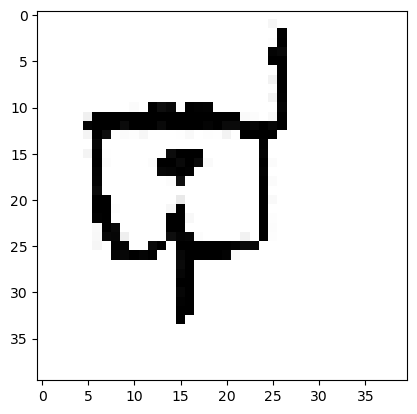

In [20]:
draw_n_guess_the_character()